In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
%matplotlib inline

In [2]:
import pickle

#Replace 'path_to_pickle_file.pkl' with the actual path to your pickle file
file_path = 'error_step.pkl'

#Open the file in binary read mode and load its contents
with open(file_path, 'rb') as file:
    data = pickle.load(file)

#Now 'data' contains the content of the pickle file
print(data)


                                  0        1  2  3
0       68804396_74737424429_397490  1000062  0  1
1       68804396_74737424429_397490  1000062  1  1
2       68804396_74737424429_397490  1000062  2  1
3       68804396_74737424429_397490  1000062  3  1
4       68804396_74737424429_397490  1000062  4  1
...                             ...      ... .. ..
557609   931268933_219402947_599432  9999875  0  1
557610   931268933_219402947_599432  9999875  1  2
557611   931268933_219402947_599432  9999875  2  1
557612   931268933_219402947_599432  9999875  3  1
557613   931268933_219402947_599432  9999875  4  1

[557614 rows x 4 columns]


In [3]:
data

,0,1,2,3
0,68804396_74737424429_397490,1000062,0,1
1,68804396_74737424429_397490,1000062,1,1
2,68804396_74737424429_397490,1000062,2,1
3,68804396_74737424429_397490,1000062,3,1
4,68804396_74737424429_397490,1000062,4,1
...,...,...,...,...
557609,931268933_219402947_599432,9999875,0,1
557610,931268933_219402947_599432,9999875,1,2
557611,931268933_219402947_599432,9999875,2,1
557612,931268933_219402947_599432,9999875,3,1


In [4]:
data.rename(columns = {0:'visitor_id', 1:'client_id', 2:'process_steps', 3:'count_of_steps'}, inplace=True)
data


,visitor_id,client_id,process_steps,count_of_steps
0,68804396_74737424429_397490,1000062,0,1
1,68804396_74737424429_397490,1000062,1,1
2,68804396_74737424429_397490,1000062,2,1
3,68804396_74737424429_397490,1000062,3,1
4,68804396_74737424429_397490,1000062,4,1
...,...,...,...,...
557609,931268933_219402947_599432,9999875,0,1
557610,931268933_219402947_599432,9999875,1,2
557611,931268933_219402947_599432,9999875,2,1
557612,931268933_219402947_599432,9999875,3,1


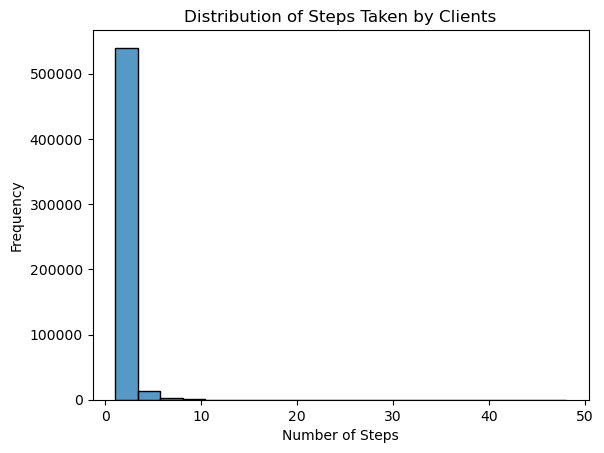

In [8]:
# Plot distribution of steps taken
sns.histplot(data['count_of_steps'], bins=20)
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.title('Distribution of Steps Taken by Clients')
plt.show()

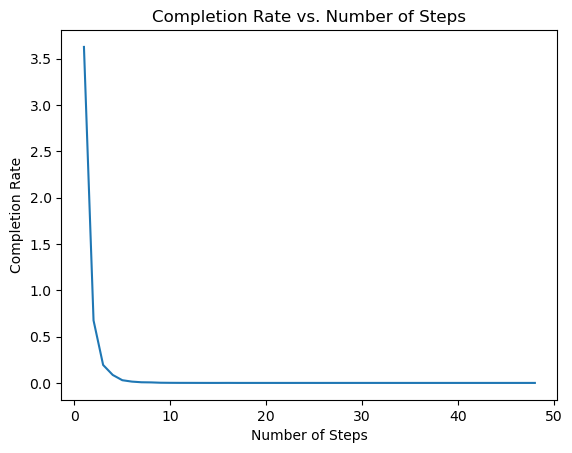

In [9]:
# Determine completion rates
completion_rates = data.groupby('count_of_steps')['client_id'].count() / data['client_id'].nunique()
completion_rates = completion_rates.reset_index()
completion_rates.columns = ['count_of_steps', 'completion_rate']

# Plot completion rates
sns.lineplot(x='count_of_steps', y='completion_rate', data=completion_rates)
plt.xlabel('Number of Steps')
plt.ylabel('Completion Rate')
plt.title('Completion Rate vs. Number of Steps')
plt.show()

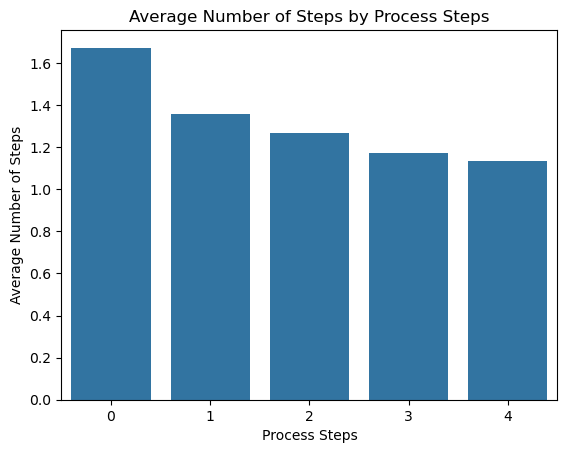

In [10]:
# Average steps by process steps
average_steps = data.groupby('process_steps')['count_of_steps'].mean().reset_index()

# Plot average steps
sns.barplot(x='process_steps', y='count_of_steps', data=average_steps)
plt.xlabel('Process Steps')
plt.ylabel('Average Number of Steps')
plt.title('Average Number of Steps by Process Steps')
plt.show()

# Distribution of Steps Taken by Clients:

#The histogram shows that most clients complete their tasks within a smaller number of steps, indicating that the process might be efficient for a majority of users.

#Completion Rate vs. Number of Steps:

#The line plot indicates that the completion rate decreases as the number of steps increases. This suggests that users are less likely to complete processes that require more steps.
#Average Number of Steps by Process Steps:

#The bar plot shows the average number of steps for each process step. This can help identify which steps in the process are more time-consuming and might need improvement.

In [15]:
# Load the data (replace 'your_data.csv' with the actual file path)
data = pd.read_csv('error_step.csv')

# Display the first few rows of the dataset
print(data.head())

# Display information about the dataset
print(data.info())

# Display basic statistics for numerical columns
print(data.describe())

                    visitor_id  client_id  process_steps  count_of_steps
0  68804396_74737424429_397490    1000062              0               1
1  68804396_74737424429_397490    1000062              1               1
2  68804396_74737424429_397490    1000062              2               1
3  68804396_74737424429_397490    1000062              3               1
4  68804396_74737424429_397490    1000062              4               1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557614 entries, 0 to 557613
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   visitor_id      557614 non-null  object
 1   client_id       557614 non-null  int64 
 2   process_steps   557614 non-null  int64 
 3   count_of_steps  557614 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 17.0+ MB
None
          client_id  process_steps  count_of_steps
count  5.576140e+05  557614.000000   557614.000000
mean   5.012493e+06     

In [16]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (for simplicity, dropping them)
data = data.dropna()

# Ensure data types are correct
data['visitor_id'] = data['visitor_id'].astype(str)
data['client_id'] = data['client_id'].astype(str)
data['process_steps'] = data['process_steps'].astype(int)
data['count_of_steps'] = data['count_of_steps'].astype(int)


visitor_id        0
client_id         0
process_steps     0
count_of_steps    0
dtype: int64


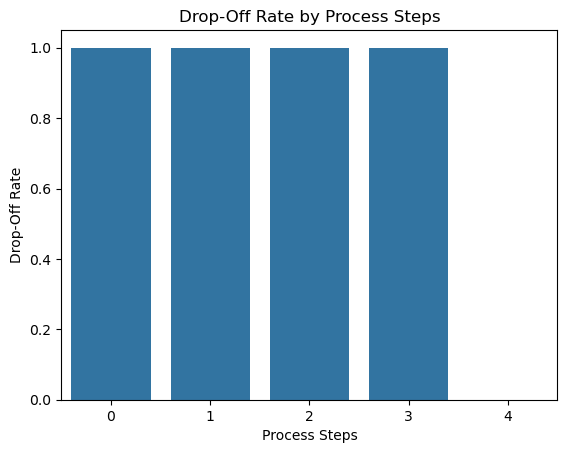

In [17]:
# Create a new column to indicate if a user dropped off (1 if dropped off, 0 otherwise)
# Assuming the maximum step in the process is `max_step`
max_step = data['process_steps'].max()
data['drop_off'] = data.apply(lambda row: 1 if row['process_steps'] < max_step else 0, axis=1)

# Calculate drop-off rate by process steps
drop_off_rate_by_process = data.groupby('process_steps')['drop_off'].mean().reset_index()
drop_off_rate_by_process.columns = ['process_steps', 'drop_off_rate']

# Plot drop-off rate by process steps
sns.barplot(x='process_steps', y='drop_off_rate', data=drop_off_rate_by_process)
plt.xlabel('Process Steps')
plt.ylabel('Drop-Off Rate')
plt.title('Drop-Off Rate by Process Steps')
plt.show()


Conclusion: 

Drop-Off Rate by Process Steps:

The bar plot indicates which steps in the process have the highest drop-off rates, suggesting areas where users are more likely to abandon the process.

# Error Rates:
Definition: The frequency of instances where users go back to a previous step, indicating potential confusion or errors.
Calculation: Number of instances where users go back to a previous step / Total number of users.


In [19]:
# Display the first few rows of the dataset
print(data.head())

# Display information about the dataset
print(data.info())

# Display basic statistics for numerical columns
print(data.describe())

# Ensure data is sorted by visitor_id and process_steps
data = data.sort_values(by=['visitor_id', 'process_steps'])

# Create a new column to indicate the previous step for each user
data['previous_step'] = data.groupby('visitor_id')['process_steps'].shift(1)

# Identify where users go back to a previous step
data['went_back'] = np.where(data['process_steps'] < data['previous_step'], 1, 0)

# Calculate the number of instances where users go back to a previous step
instances_of_going_back = data['went_back'].sum()

# Calculate the total number of unique users
total_users = data['visitor_id'].nunique()

# Calculate the desired metric
metric = instances_of_going_back / total_users

print(f"Number of instances where users go back to a previous step: {instances_of_going_back}")
print(f"Total number of users: {total_users}")
print(f"Metric (instances of going back / total users): {metric:.2%}")

                    visitor_id client_id  process_steps  count_of_steps  \
0  68804396_74737424429_397490   1000062              0               1   
1  68804396_74737424429_397490   1000062              1               1   
2  68804396_74737424429_397490   1000062              2               1   
3  68804396_74737424429_397490   1000062              3               1   
4  68804396_74737424429_397490   1000062              4               1   

   drop_off  
0         1  
1         1  
2         1  
3         1  
4         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557614 entries, 0 to 557613
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   visitor_id      557614 non-null  object
 1   client_id       557614 non-null  object
 2   process_steps   557614 non-null  int64 
 3   count_of_steps  557614 non-null  int64 
 4   drop_off        557614 non-null  int64 
dtypes: int64(3), object(2)
memory usage

In [7]:

#0 - visitor id 

#1 client id 

#2 - process_step

#3 - count_of_step



In [5]:
#data.to_csv('error_step.csv', index=False)